# Caso 3: Clustering para segmentación de variedades de semillas

## Introducción

Este cuaderno explora la aplicación de técnicas de clustering para segmentar variedades de semillas de trigo basadas en sus características físicas. El objetivo es demostrar cómo el clustering puede identificar grupos naturales dentro de un conjunto de datos y proporcionar insights útiles para aplicaciones prácticas en agronomía y otras ciencias relacionadas.

## Descripción del Conjunto de Datos

El conjunto de datos de semillas contiene mediciones de 210 granos de trigo pertenecientes a tres diferentes variedades: Kama, Rosa y Canadian. Cada muestra tiene siete características geométricas que son útiles para estudiar las diferencias físicas entre las variedades de semillas.

In [5]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Seeds dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel', 'asymmetry_coefficient', 'length_kernel_groove', 'type']
data = pd.read_csv(url, sep='\s+', names=columns)

# Preprocessing
scaler = StandardScaler()
features = data.columns[:-1]  # Exclude the label column 'type'
data_scaled = scaler.fit_transform(data[features])

## Fundamentos Matemáticos del Algoritmo K-means

El algoritmo K-means es una técnica de clustering que particiona un conjunto de `n` observaciones en `k` clusters en los cuales cada observación pertenece al cluster con la media más cercana. Es un método iterativo que busca minimizar la suma de las distancias cuadradas entre los puntos y el centroide de su cluster asignado.

### Descripción del Algoritmo:
1. **Inicialización**: Se seleccionan `k` puntos al azar del conjunto de datos como los centroides iniciales.
2. **Asignación de Cluster**: Cada punto del conjunto de datos es asignado al centroide más cercano.
3. **Actualización de Centroides**: Se recalculan los centroides como el promedio de todos los puntos asignados a cada cluster.
4. **Iteración**: Se repiten los pasos 2 y 3 hasta que los centroides no cambian significativamente entre iteraciones consecutivas, indicando convergencia.

### Función Objetivo:
$$ J = \sum_{j=1}^k \sum_{i=1}^n \| x^{(i)} - c_j \|^2 $$
Donde $x^{(i)}$ es el punto $i$ en el conjunto de datos, $c_j$ es el centroide del cluster $j$, y $n$ es el número de puntos en el cluster $j$.


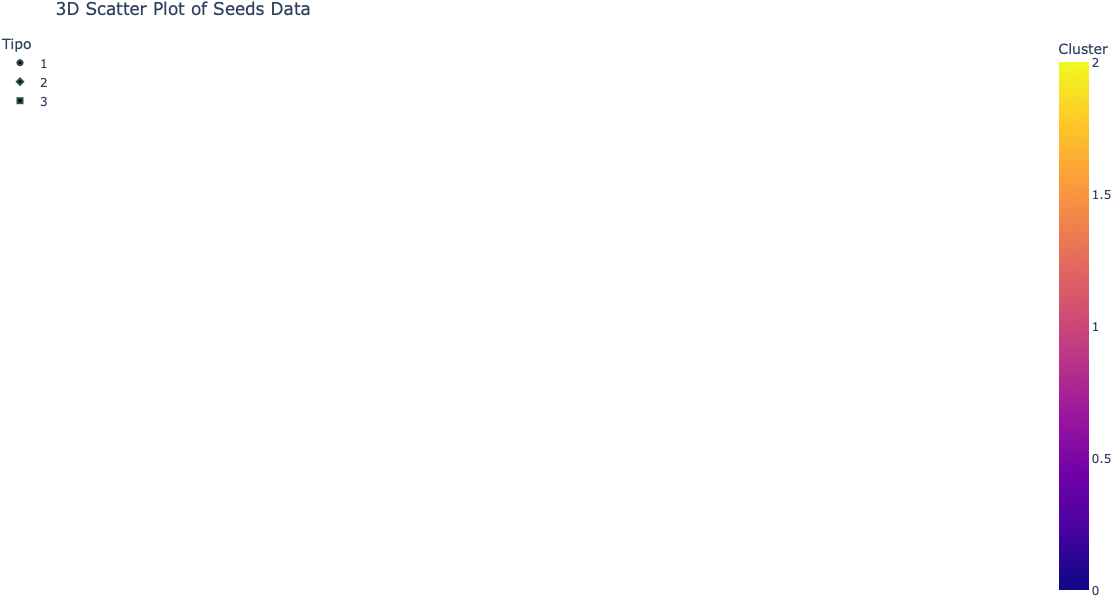

In [39]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Assuming 'data' has a 'Cluster' column from the K-means result
fig = px.scatter_3d(data, x='area', y='perimeter', z='length_kernel', color='Cluster',
                    symbol='type',  # Optional, if you want to differentiate by another categorical variable
                    labels={
                        "area": "Área",
                        "perimeter": "Perímetro",
                        "length_kernel": "Longitud del Grano",
                        "Cluster": "Cluster",
                        "type": "Tipo"
                    },
                    title="3D Scatter Plot of Seeds Data")

# Update marker appearance
fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')))

# Enhance the layout to make the plot larger
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=30),
    width=800,  # Width of the plot in pixels
    height=600,  # Height of the plot in pixels
    legend=dict(
        x=0,  # X position of the legend (0 is far left, 1 is far right)
        y=1,  # Y position of the legend (0 is at the bottom, 1 is at the top)
        bgcolor='rgba(255, 255, 255, 0.5)'  # Background color with transparency
    )
)

fig.show()

## Validación del Clustering

Para validar los resultados del clustering, comparamos los clusters generados por el algoritmo K-means con las categorías reales proporcionadas en el conjunto de datos. Utilizamos la matriz de confusión y el informe de clasificación para evaluar cómo los clusters corresponden a las variedades de semillas reales.

Es importante mencionar que K-means es un algoritmo de clustering no supervisado y no utiliza etiquetas durante el entrenamiento. Sin embargo, al tener etiquetas disponibles, podemos utilizarlas post-hoc para evaluar la calidad del clustering de una manera supervisada.


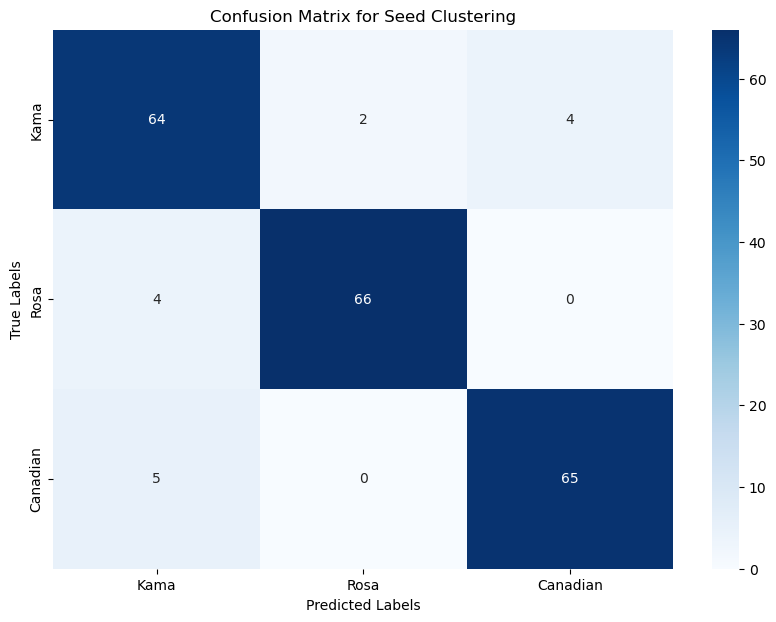

In [37]:
# Homogeneize data types between predicted and true labels
predicted_label = []
for pl in data["predicted_label"]:
    if pl == "Canadian":
        predicted_label.append(1)
    elif pl == "Kama":
        predicted_label.append(2)
    else:
        predicted_label.append(3)
predicted_label = np.array(predicted_label)

true_label = np.array(data["type"])

# Create confusion matrix
conf_matrix = confusion_matrix(true_label, predicted_label)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=cluster_to_type_map.values(), yticklabels=cluster_to_type_map.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Seed Clustering')
plt.show()
